Praktikum Pembelajaran Mesin 2
<br>Nama : Husni Na'fa Mubarok
<br>NIM : 121450078
<br>Kelas : RA

In [3]:
import pandas as pd #import package pandas untuk manipulasi dan analisis data
import numpy as np #import package numpy untuk manipulasi numerik dan fungsi matematis
import matplotlib.pyplot as plt #Matplotlib untuk visualisasi
import seaborn as sns; sns.set() #Seaborn untuk visualisasi
import math #import math untuk fungsi matematis
from sklearn.linear_model import LinearRegression, LogisticRegression #import model Regresi Linear dan Regresi Logistik
from sklearn.model_selection import train_test_split # package untuk split data menjadi data train dan test
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report #import package untuk mengetahui parameter statistik seperti MSE, MAE, confusion Matrix, laporan Klasifikasi
from sklearn import preprocessing #package untuk proses preprocessing
from sklearn.preprocessing import PolynomialFeatures #import pakckage untuk Fitur pada regresi Polynomial
from sklearn.pipeline import make_pipeline # fungsi utilitas yang merupakan singkatan untuk membangun pipe_line berguna untuk mentransformasi dan training data dengan cepat
from sklearn.base import BaseEstimator, TransformerMixin # BaseEstimator digunakan untuk membuat estimator kustom, TransformerMixin digunakan untuk membuat transformer kustom
from scipy.special import expit # expit untuk menghitung fungsi logistik atau sigmoid dari suatu nilai.
from sklearn.naive_bayes import GaussianNB #digunakan untuk fungsi Gaussian


## A.Regresi linier sederhana(Simple Linear Regression)

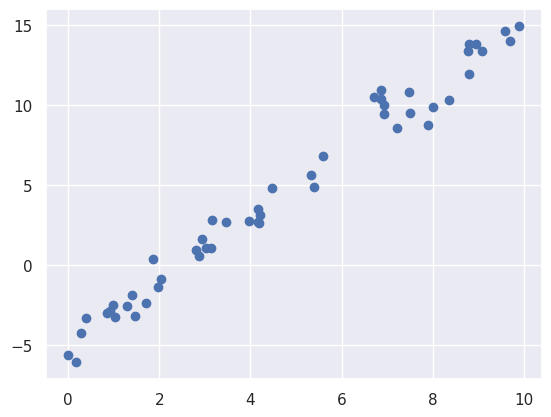

In [4]:
rng = np.random.RandomState(1) #untuk mendapatkan nilai random
x = 10 * rng.rand(50) #mendapatkan 50 nilai random pada sumbu x
y = 2 * x - 5 + rng.randn(50) #mendapatkan 50 nilai random berdasarkan fungsi y
plt.scatter(x,y); #visualisasi sumbu x dan y

Model slope:   2.0272088103606953
Model intercept: -4.998577085553204


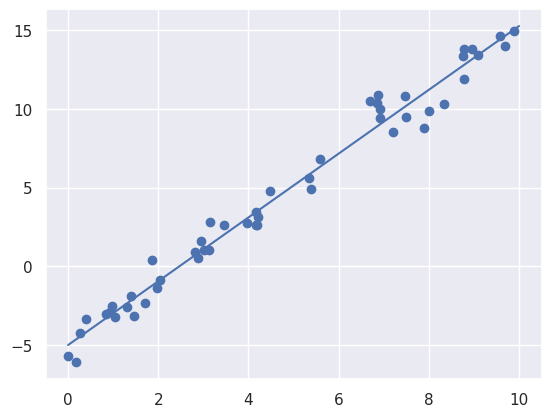

In [5]:
model = LinearRegression(fit_intercept=True) #membuat variabel model Regresi linear

model.fit(x[:,np.newaxis], y) #fitting data x dan y pada model

xfit = np.linspace(0, 10, 1000) #membuat array xfit yang berisi 1000 angka dalam rentang antara 0 hingga 10 dengan jarak yang merata
yfit = model.predict(xfit[:, np.newaxis]) #melakukan prediksi dengan menggunakan model yang telah dilatih (model) pada setiap nilai dalam array xfit

plt.scatter(x,y) #membuat scatter plot data x dan y
plt.plot(xfit,yfit); #membuat garis regresi linear xfit,yfit

print("Model slope:  ", model.coef_[0]) #menampilkan nilai slope
print("Model intercept:", model.intercept_) #menampilkan nilai intercept

### A1. Jika persamaan diubah menjadi y = −9x + 6, analisis hasil yang diperoleh.

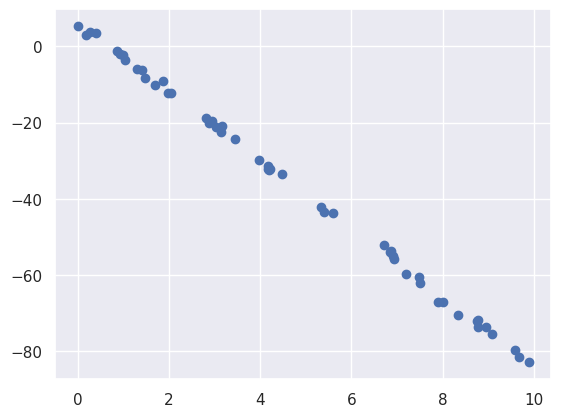

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = (-9) * x + 6 + rng.randn(50)
plt.scatter(x,y);

Model slope:   -8.972791189639302
Model intercept: 6.001422914446785


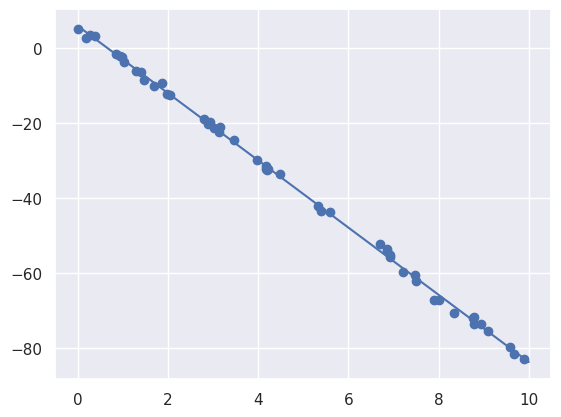

In [7]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit);

print("Model slope:  ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model regresi menunjukan korelasi negatif dari kedua variabel

### A2. Jika persamaan diubah seperti di Latihan A1 apa yang terjadi pada model slope dan intercept nya?jelaskan!

slope (kemiringan) dari garis regresi mengukur seberapa banyak y berubah saat x berubah. Slope mengindikasikan arah dan tingkat perubahan dalam hubungan antara x dan y Sedangkan intercept (potongan) merupakan titik di mana garis tersebut memotong sumbu y ketika x=0. Model slope:   -8.972791189639302 yang mengindikasikan nilai y berkurang/menurun seiring bertambah/meningkatnya x. Model intercept: 6.001422914446785 merepresentasikan nilai awal y ketika x = 0.

## B.Multiple Linear Regresi

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station   
0             2012.917          32.0                                84.87882  \
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude   
0                               10     24.98298     121.54024  \
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


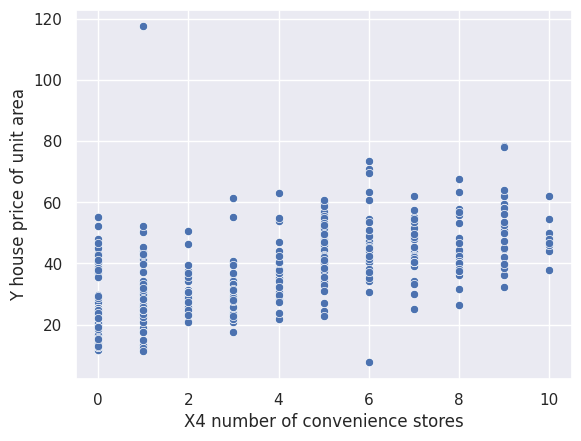

In [8]:
df = pd.read_csv('Real-estate1.csv') #import data Real Estate ke dalam variabel df
df.drop('No', inplace = True, axis = 1) #menghapus kolom Nomor
print(df.head()) #menampilkan 5 baris pertama dari df
print(df.columns) #menampilkan nama-nama kolom pada df

sns.scatterplot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', data = df) #membuat scatter plot dengan sumbu x jumlah toko dan sumbu y harga rumah per luas area

X = df.drop('Y house price of unit area', axis = 1) #memasukan semua kolom ke dalam Variabel X kecuali kolom Harga rumah
y = df['Y house price of unit area'] #memasukan kolom Harga Rumah ke dalam Variabel Y
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #split data train dan test dengan komposisi 70:30

model = LinearRegression() #memasukan fungsi model Regresi Linear ke dalam variabel model

model.fit(X_train, y_train) #fitting model ke data train

predictions = model.predict(X_test) #prediksi menggunakan data test

print('MSE : ', mean_squared_error(y_test, predictions)) #mencetak nilai MSE
print('MAE : ', mean_absolute_error(y_test, predictions)) #mencetak nilai MAE

### B1. Jelaskan fungsi dari baris code diatas? Buatlah step step code dalam pseudocode yang terdapat dicode diatas.

Fungsi kode diatas yaitu membuat model regresi linear untuk memprediksi harga rumah berdasarkan variabel number of convenience stores (Jumlah Toko Serba Ada/ Super Market)

Pseudo Code
- Import library pandas dan membaca data dari file CSV
<br>df = read_csv('Real-estate1.csv')

- Menghapus kolom 'No'
<br>df.drop('No', inplace=True, axis=1)

- Menampilkan 5 baris pertama dari dataframe
<br>print(df.head())

- Menampilkan nama-nama kolom
<br>print(df.columns)

- Membuat scatter plot
<br>scatterplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df)

- Memisahkan variabel independen (X) dan variabel dependen (y)
<br>X = df.drop('Y house price of unit area', axis=1)
<br>y = df['Y house price of unit area']

- Memisahkan data menjadi data pelatihan dan data pengujian (70:30)
<br>X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- Membuat model Regresi Linear
<br>model = LinearRegression()

- Melatih model dengan data pelatihan
<br>model.fit(X_train, y_train)

- Melakukan prediksi dengan data pengujian
<br>predictions = model.predict(X_test)

- Menghitung nilai MSE (Mean Squared Error) dan MAE (Mean Absolute Error)
<br>mse = mean_squared_error(y_test, predictions)
<br>mae = mean_absolute_error(y_test, predictions)

- Menampilkan hasil evaluasi kinerja model
<br>print('MSE:', mse)
<br>print('MAE:', mae)

## C.Fungsi Basis

### Fungsi basis polynomial

In [9]:
x = np.array([2,3,4]) #membuat array [2,3,4] dan memasukan ke dalam variabel x
poly = PolynomialFeatures(3, include_bias=False) #membuat variabel fungsi Polynomial Faetures dengan derajat 3
poly.fit_transform(x[:, None]) #fitting fungsi polynom pada data x yang menghasilkan matriks fitur akan berisi fitur-fitur polinomial dari derajat 1 hingga 3 dari x

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [10]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression()) #membuat poly_model menggunakan pipeline yang menggunakan model regresi linear yang memiliki fitur-fitur polinomial hingga derajat 7.

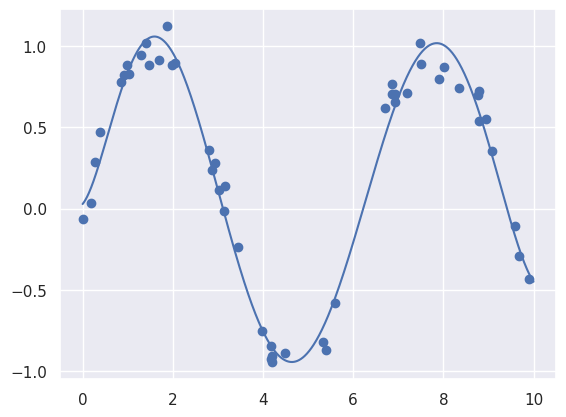

In [11]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

### C.1 jika nilai fungsi dari y kita ubah menjadi y = sin (1 + x^2) bagaimana code dan hasil kurva nya? Jelaskan!

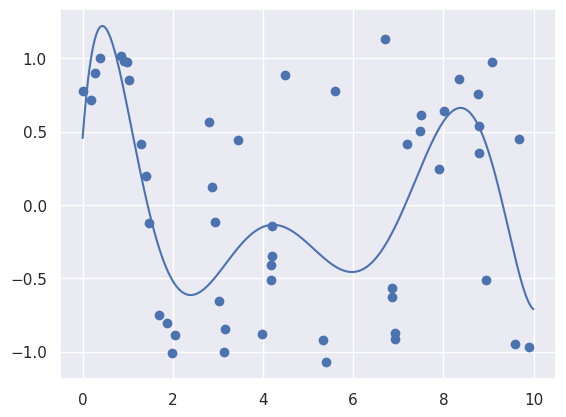

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(1 + x ** 2) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

Hasil kurva menunjukan bahwa fungsi y membuat data tersebar secara acak dan membuat pola yang tidak simetris

### Fungsi Basis Gaussian

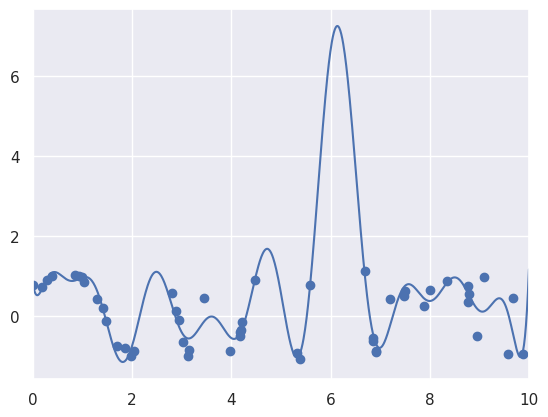

In [13]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
  def __init__(self, N, width_factor=2.0):
    self.N=N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis = None):
    arg = (x-y)/width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y = None):
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self

  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis = 1)


gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

### C2. Buatlah Pseudocode dari code diatas dan analisis nilai xfit dan yfit yang diperoleh?

Pseudo Code
- Membuat kelas GaussianFeatures yang merupakan custom transformer
<br>class GaussianFeatures(BaseEstimator, TransformerMixin):
-  Konstruktor untuk kelas GaussianFeatures
<br>def __init__(self, N, width_factor=2.0):
- Menginisialisasi jumlah basis Gaussian (N) dan faktor lebar (width_factor)
<br>self.N = N
<br>self.width_factor = width_factor

- Fungsi basis Gaussian
<br>def _gauss_basis(x, y, width, axis=None):
- Menghitung argumen fungsi Gaussian
<br>arg = (x - y) / width
- Menghitung nilai Gaussian
<br>return np.exp(-0.5 * np.sum(arg ** 2, axis))

- Metode untuk memfiturkan data
<br>def fit(self, X, y=None):
- Menentukan pusat-pusat basis Gaussian
<br>self.centers_ = np.linspace(X.min(), X.max(), self.N)
- Menghitung lebar basis Gaussian
<br>self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
- Mengembalikan objek GaussianFeatures yang sudah difit
<br>return self

- Metode untuk melakukan transformasi data
<br>def transform(self, X):
- Menghitung nilai basis Gaussian untuk setiap data
<br>return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)


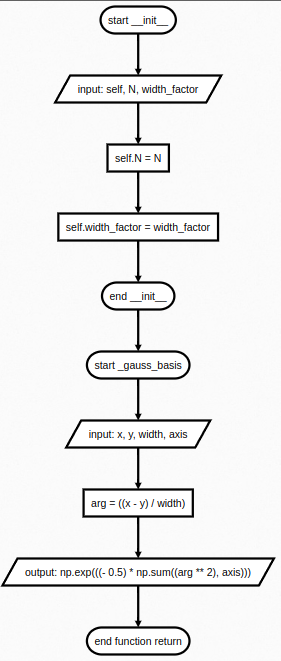

model regresi menggunakan Gaussian Feature menunjukan model overfit karena menggunakan nilai derajat tinggi yaitu 20 sehingga model sangat sensitif terhadap perubahan data

### Fungsi Basis Sigmoid

In [14]:
def sigmoid(x):
  return 1.0 / (1.0 +np.exp(-x))

print(sigmoid(0.5))

0.6224593312018546


In [15]:
print(expit(0.5))

0.6224593312018546


In [16]:
arr = np.array([-2, -1.5, -1, 0, 1, 1.5, 2])
print(sigmoid(arr))

[0.11920292 0.18242552 0.26894142 0.5        0.73105858 0.81757448
 0.88079708]


In [17]:
values = [-2, -1.5, -1, 0, 1, 1.5, 2]
print([sigmoid(value) for value in values])

[0.11920292202211755, 0.18242552380635635, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8175744761936437, 0.8807970779778823]


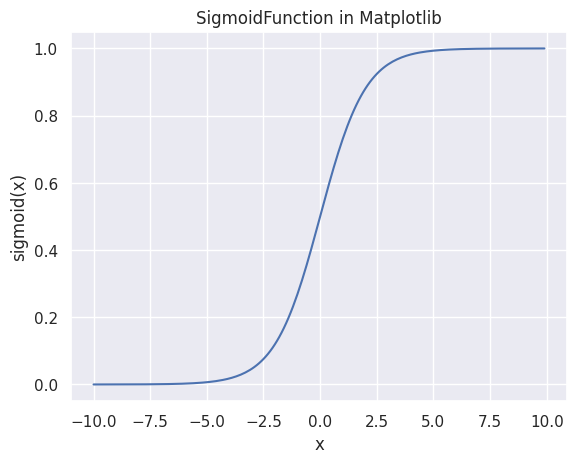

In [18]:
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

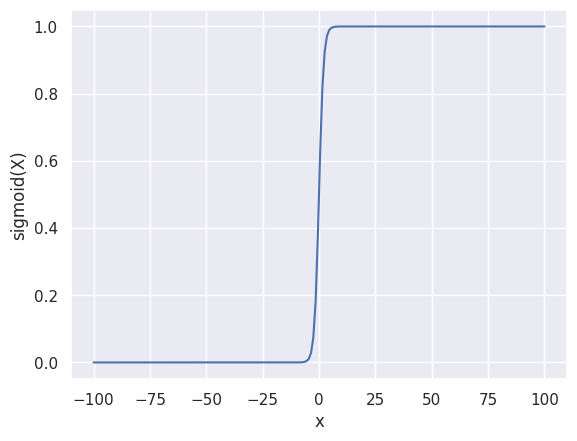

In [19]:
x = np.linspace(-100,100,200)
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('sigmoid(X)')
plt.show()

### C3. Buatlah Pseudo code dari code diatas, jelakan fungsi mengapa curva yang muncul berbeda dan tunjukan perbedaaannya?

Pseudo Code
- Fungsi sigmoid
<br>function sigmoid(x):
<br>return 1.0 / (1.0 + e^(-x))

- Memanggil fungsi sigmoid dengan input 0.5
<br>result = sigmoid(0.5)

- Cetak hasil
<br>print(result)


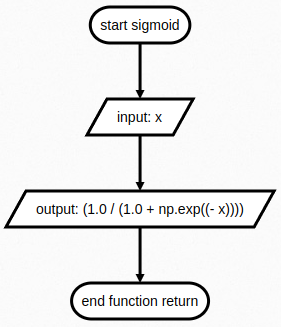

Gambar kurva berbeda karena range data berbeda, plot pertama berada pada range -10 sampai 10 sehingga lengkungan garis fungsi sigmoid terlihat jelas, plot kedua berada pada range -100 sampai 100 lengkungan garis fungsi sigmoid terlihat kaku/ perubahnya drastis.

## D.Regresi Linear Bayesian

In [20]:
import pymc as pm

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [slope, intercept, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


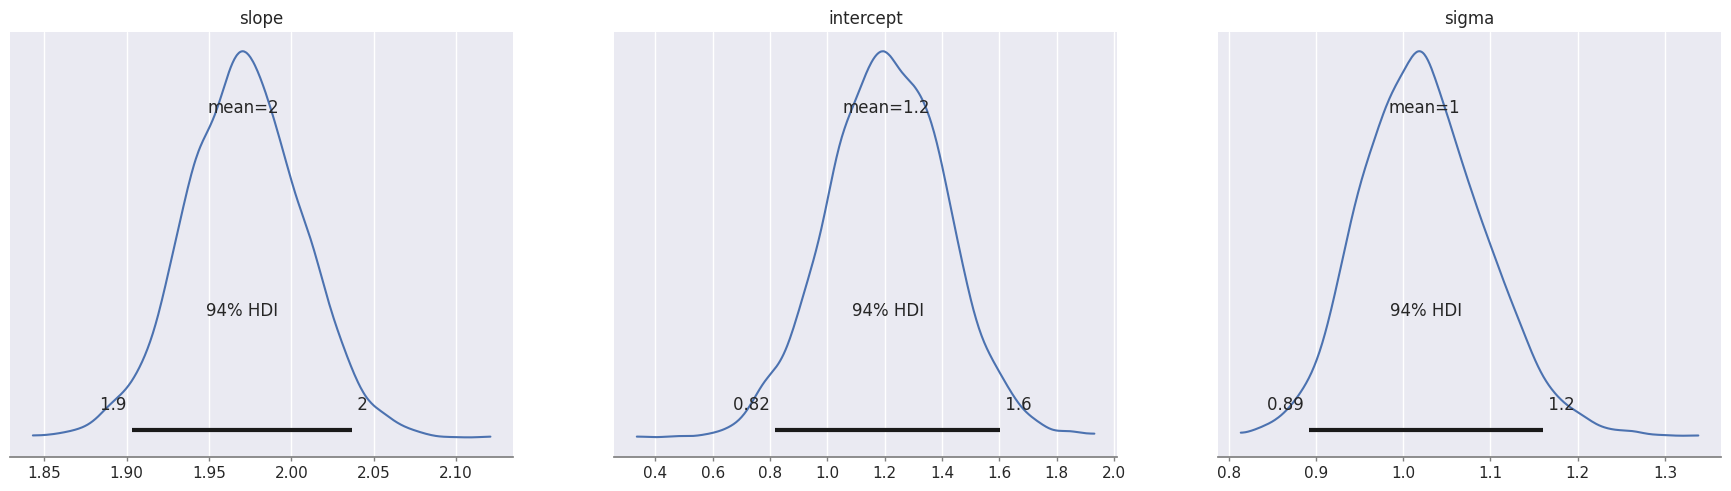

In [21]:
np.random.seed(0)
X = np.linspace(0,10,100)
true_slope = 2
true_intercept = 1
Y = true_intercept + true_slope * X + np.random.normal(0,1, size = 100)

with pm.Model() as model:
  slope = pm.Normal('slope', mu = 0, sigma = 10)
  intercept = pm.Normal('intercept', mu = 0, sigma = 10)
  sigma = pm.HalfNormal('sigma', sigma = 1)

  mu = intercept + slope * X

  Y_obs = pm.Normal('Y_obs', mu = mu, sigma = sigma, observed = Y)

  trace = pm.sample(2000, tune = 1000)

pm.plot_posterior(trace, var_names = ['slope', 'intercept', 'sigma'])
plt.show()

### D1. buatlah pseudo code dari code diatas dan jelakan penerapan dari likelihood, prior dan posterior yang di gunakan dalam code diatas.

pseudo code
- Membuat model PyMC3
<br>model = create_new_PyMC3_model()

- Menentukan variabel slop sebagai distribusi Normal dengan mean 0 dan sigma 10
<br>slope = Normal('slope', mean=0, sigma=10)

- Menentukan variabel intercept sebagai distribusi Normal dengan mean 0 dan sigma 10
<br>intercept = Normal('intercept', mean=0, sigma=10)

- Menentukan variabel sigma sebagai distribusi HalfNormal dengan sigma 1
<br>sigma = HalfNormal('sigma', sigma=1)

- Menghitung nilai mu (mean) berdasarkan slope, intercept, dan data X
<br>mu = intercept + slope * X

- Menentukan variabel Y_obs sebagai distribusi Normal dengan mean mu dan sigma sigma
<br>Y_obs = Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

- Melakukan sampling dari model dengan 2000 iterasi dan 1000 tuning steps
<br>trace = sample_from_model(model, 2000, tune=1000)


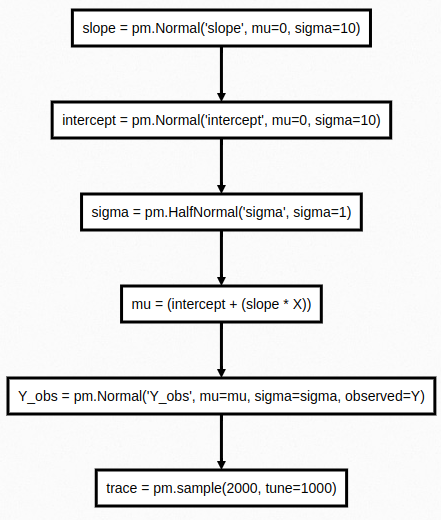

Kode di atas adalah implementasi Bayesian Linear Regression (Regressi Linear Bayesian) menggunakan library PyMC3 dalam bahasa pemrograman Python. Tujuan dari kode ini adalah untuk melakukan analisis Bayesian terhadap model regresi linear terhadap data yang dihasilkan secara sintetis Jadi, kode diatas digunakan untuk melakukan analisis statistik Bayesian terhadap model regresi linear terhadap data yang dihasilkan secara sintetis. Hasil dari analisis ini adalah distribusi posterior dari parameter-parameter model, yang memberikan perkiraan terhadap nilai-nilai sejati dari parameter-parameter tersebut berdasarkan data yang diamati dan prior yang didefinisikan.

## E. Regresi Logistik

In [22]:
plt.rcParams['figure.figsize'] = (10,6) #membuat frame dari visualisasi yang akan digunakan dengan ukuran 10 * 6

data = pd.read_csv('Social_Network_Ads.csv') #import dataset
data.head() #menampilkan 5 data teratas

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


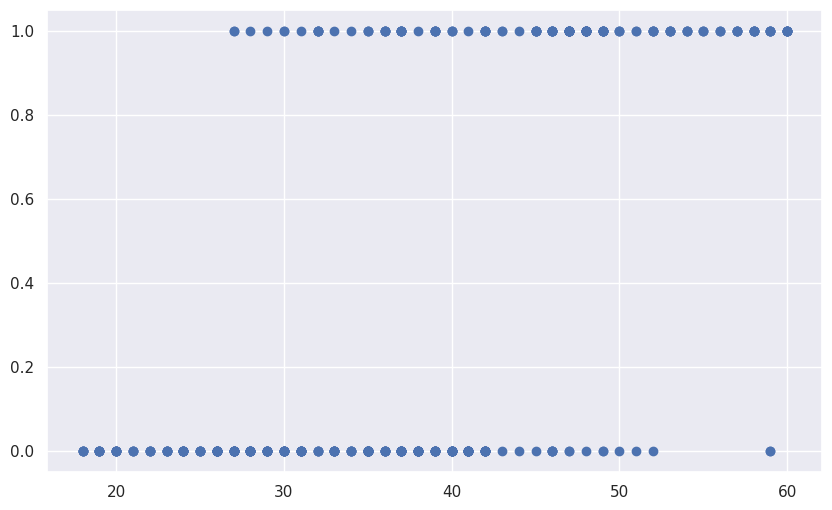

In [23]:
plt.scatter(data['Age'], data['Purchased']) #membuat scatter plot dari data dengan sumbu x kolom Age dan sumbu y kolom Purchased
plt.show() #menampilkan plot

X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20) #split data menjadi data train dan test dangan komposisi 80:20

In [24]:
def normalize(X): #definisikan fungsi normalisasi dengan parameter X
  return X - X.mean() #mengurangi setiap nilai X dengan nilai rataan X

def predict(X, b0, b1): #membuat fungsi predict dengan parameter X, b0 dan b1
  return np.array([1/(1+math.exp(-1*b0 + -1*b1*x)) for x in X]) #menerapkan fungsi logistik pada parameter input

def logistic_regression(X, Y): #mendefinisikan fungsi regresi logistik dengan parameter X dan Y
  X = normalize(X) #melakukan normalisasi data X

  b0 = 0 #menentukan nilai awal b0 = 0
  b1 = 0 #menentukan nilai awal b1 = 0
  L = 0.001  # menentukan Learning rate = 0.001
  epochs = 300 #jumlah iterasi = 300

  for epoch in range(epochs): #perulangan berdasarkan nilai epochs
    y_pred = predict(X, b0, b1)
    D_b0 = -2 * sum((Y-y_pred) * y_pred * (1-y_pred))
    D_b1 = -2 * sum(X * (Y-y_pred) * y_pred * (1-y_pred))
    b0 = b0 - L * D_b0
    b1 = b1 - L * D_b1

  return b0, b1 #mengembalikan nilai b0 dan b1

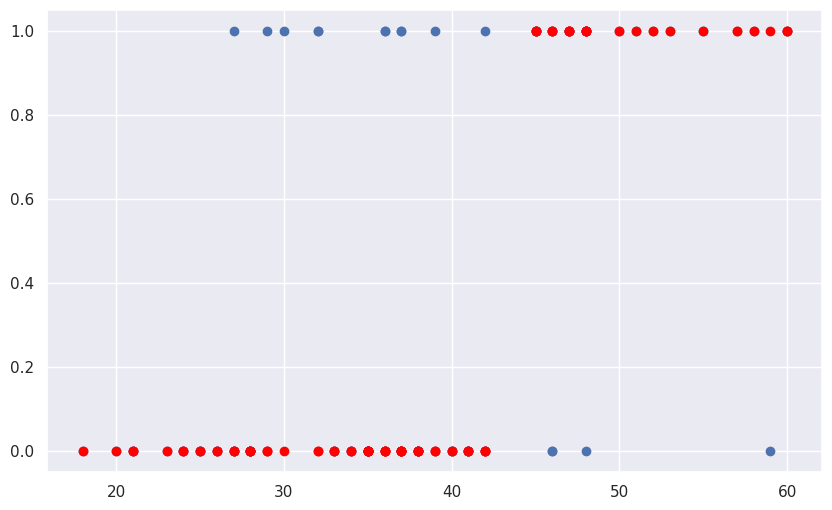

Accuracy = 0.8125


In [25]:
b0, b1 = logistic_regression(X_train, y_train) menerapkan fungsi regresi logistik pada data train

X_test_norm = normalize(X_test) #normalisasi data test
y_pred = predict(X_test_norm, b0, b1) #memprediksi nilai X test
y_pred = [1 if p >= 0.5 else 0 for p in y_pred] #mendapatkan nilai prediksi Y

plt.clf() #clean figure menghapus semua elemen yang ada pada plot
plt.scatter(X_test, y_test) #membuat scatter plot data test
plt.scatter(X_test, y_pred, c = 'red') #membuat scarrer plot dari hasil prediksi
plt.show()

accuracy = 0 # inisiasi nilai awal akurasi
for i in range(len(y_pred)): #looping berdasarkan jumlah data hasil prediksi
  if y_pred[i] == y_test.iloc[i]: #memeriksa apakah hasil prediksi sama dengan data test
    accuracy += 1 #menambah nilai akurasi sejumlah 1 setiap data bernilai True

print(f'Accuracy = {accuracy/len(y_pred)}') #menghitung nilai akurasi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


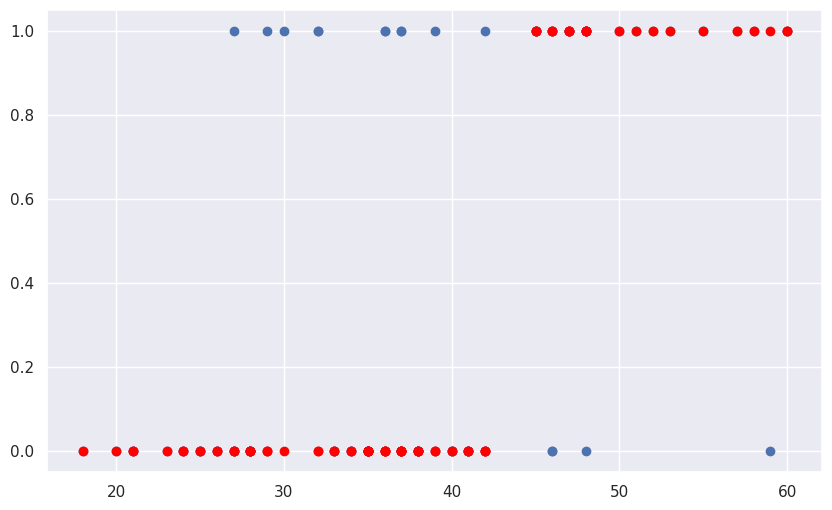

Accuracy = 0.8125


In [26]:
#mengulangi proses di atas menggunakan package LogisticRegression()
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c = 'red')
plt.show()

print(f'Accuracy = {lr_model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))}')

Hasil plot dan nilai akurasi sama

### E1. Buatlah flowchart dari code dibagian E, dan jelaskan setiap baris dari code diatas.

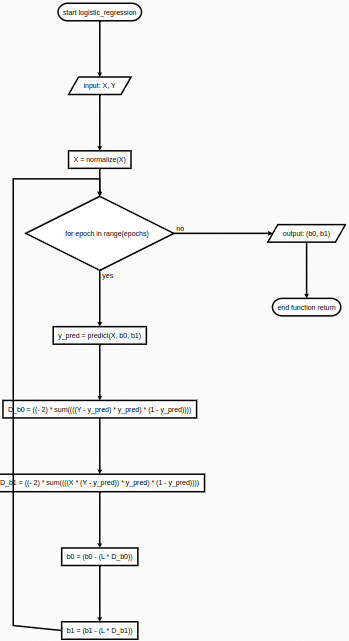

## F. Naïve Bayes

In [27]:
caesarian = pd.read_csv('caesarian.txt') #import data Caesarian
caesarian.head() #menampilkan 5 data teratas

,Age,Dev_number,Dev_time,Blood_preassure,heart_problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [28]:
x = caesarian.drop('caesarian', axis = 1) #memasukan semua kolom kecuali kolom caesarian ke dalam variabel x
x.head() #menampilkan 5 data teratas dari x

,Age,Dev_number,Dev_time,Blood_preassure,heart_problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [29]:
y = caesarian['caesarian'] #memasukan kolom caesarian ke dalam variabel y
y.head() #menampilkan 5 data teratas dari y

0    0
1    1
2    0
3    0
4    1
Name: caesarian, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123) #split data menjadi data train dan test dengan komposisi 80:20

In [31]:
modelnb = GaussianNB() #memasukan fungsi model Naive Bayes ke dalam variabel modelnb
nbtrain  =modelnb.fit(x_train, y_train) #fitting data train menggunakan modelnb

y_pred = nbtrain.predict(x_test) #prediksi nilai data test
y_pred #menampilkan nilai y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [32]:
y_test.to_numpy() #menampilkan nilai y_test

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [33]:
y_actual = pd.Series([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], name = 'actual') #memasukan nilai y_test ke dalam variabel y_actual
y_pred = pd.Series([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], name = 'prediction') #memasukan nilai hasil prediksi ke dalam variabel y_pred
df_confusion = pd.crosstab(y_actual, y_pred) #membuat confusion matrix dari y_actual dan y_pred
df_confusion #menampilkan confusion matrix

prediction,0,1
actual,,
0,5,4
1,5,2


In [34]:
print(classification_report(y_test, y_pred)) #menampilkan nilai summary performa atau akurasi model

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.33      0.29      0.31         7

    accuracy                           0.44        16
   macro avg       0.42      0.42      0.42        16
weighted avg       0.43      0.44      0.43        16



### F1. Jelaskan konsep naïve bayes dalam code diatas dan berikan flowchart dari code diatas.

Naive Bayes adalah sebuah algoritma klasifikasi yang berdasarkan pada Teorema Bayes dengan asumsi independensi yang kuat antara fitur-fitur (variabel-variabel) yang digunakan dalam model. Salah satu varian dari algoritma Naive Bayes adalah Naive Bayes Gaussian (Gaussian Naive Bayes), yang digunakan ketika data fitur-fiturnya dianggap terdistribusi Gaussian (distribusi normal).

`GaussianNB()` adalah salah satu implementasi dari algoritma Naive Bayes Gaussian dalam bahasa pemrograman Python, yang disediakan oleh library scikit-learn (sklearn). Berikut adalah konsep dasar dari `GaussianNB()`:

1. **Probabilitas Kelas Prior**: Algoritma Naive Bayes menghitung probabilitas prior dari setiap kelas dalam data pelatihan. Ini adalah probabilitas bahwa suatu contoh data masuk ke dalam suatu kelas tanpa mempertimbangkan fitur-fitur khusus dari contoh tersebut. Probabilitas prior ini digunakan sebagai tahap awal dalam perhitungan probabilitas kelas yang lebih rinci.

2. **Estimasi Distribusi Fitur**: Algoritma Naive Bayes Gaussian mengasumsikan bahwa fitur-fitur dalam data terdistribusi Gaussian (normal) di dalam setiap kelas. Dengan kata lain, ia menghitung rata-rata (mean) dan deviasi standar (standard deviation) dari setiap fitur dalam setiap kelas.

3. **Perhitungan Probabilitas Posterior**: Setelah menghitung probabilitas prior dan estimasi distribusi fitur, algoritma Naive Bayes Gaussian menghitung probabilitas posterior untuk setiap kelas, yang merupakan probabilitas bahwa contoh data tertentu termasuk dalam kelas tersebut berdasarkan fitur-fiturnya. Ini dilakukan dengan menggunakan Teorema Bayes.

4. **Prediksi Kelas**: Setelah menghitung probabilitas posterior untuk setiap kelas, algoritma memilih kelas dengan probabilitas posterior tertinggi sebagai prediksi untuk contoh data tersebut. Dalam scikit-learn, ini dapat dicapai dengan memanggil metode `.fit()` untuk melatih model dan `.predict()` untuk membuat prediksi.

Penting untuk diingat bahwa asumsi independensi kuat (naive) antara fitur-fitur adalah simplifikasi yang sering kali tidak terpenuhi dalam dunia nyata. Oleh karena itu, meskipun Naive Bayes sering digunakan dalam praktik karena efisiensinya, ia mungkin tidak selalu memberikan hasil yang optimal untuk semua jenis data. Dari hasil akurasi model pada data di atas menunjukan bahwa Model Naive Bayes tidak optimal pada data Caesarian

Flowchart dari fungsi Gaussiannb()

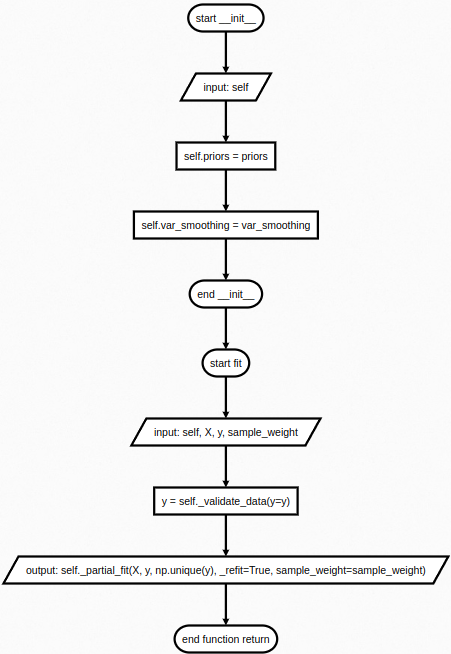